In [17]:
import os

os.chdir("/home")

# Wstęp

Zadanie 10 jest pierwszą częścią zajęć laboratoryjnych poświęconych sieciom rekurencyjnym i predykcji z wykorzystaniem danych multimodalnych. Efektem prac będzie sieć rekurencyjna do predykcji kursu kryptowaluty Bitcoin (BTC) w oparciu o dane z giełdy oraz o wyniki analizy emocji komunikatów z mediów społecznościowych, do których również należy utworzyć dedykowany model sieci rekurencyjnej. Plan realizacji etapów wygląda następująco:

1.  EmoTweet - model sieci rekurencyjnej do analizy emocji (10 pkt., laboratorium 10)
2.  Agregacja informacji emotywnej i przygotowanie MultiBTC - multimodalnego model sieci rekurencyjnej do predykcji kursu BTC (10 pkt., laboratorium 11)
3.  Ewaluacja modelu MultiBTC (10 pkt., laboratorium 12)

Łącznie można otrzymać 30 punktów.

# Cel ćwiczenia

Celem pierwszego etapu prac jest zapoznanie się z podstawową siecią rekurencyjną LSTM. Ze względu na fakt, że model ten będzie wykorzystany do analizy emocji tekstu, w ramach teorii do zadania zostanie omówiony podstawowy mechanizm konwersji słów w tekście do postaci wektorów dystrybucyjnych (tzw. word embeddings) na podstawie rozwiązania o nazwie `fastText`. Modele będą budowane na ogólnodostępnym zbiorze `TweetEval`, zawierającym podzbiory ręcznie anotowanych tweetów przy pomocy etykiet odnoszących się do następujących zjawisk: 1) emocje (emotion), 2) emotikony (emoji), 3) ironia (irony), 4) mowa nienawiści (hate speech), 5) mowa ofensywna (offensive language), 6) wydźwięk (sentiment), 7) nastawienie (stance).

# Warunki zaliczenia

Do zaliczenia pierwszego etapu należy utworzyć następujące modele dla min. 2 wybranych zjawisk:

1.  Model bazowy (regresja logistyczna).
2.  Model rekurencyjny oparty o sieć LSTM.

Wytrenowane modele będą wykorzystane w 2 etapie, dlatego proszę je zachować.

# Wektory dystrybucyjne

W przetwarzaniu języka naturalnego, o wektorach dystrybucyjnych (inaczej osadzeniach lub zanurzeniach, ang. word embeddings) mówi się w kontekście reprezentacji słów w tekście, zazwyczaj w postaci wektora liczb rzeczywistych, który koduje znaczenie słowa. Hipoteza dystrybucyjna, u podstawy której leży większość metod reprezentacji, mówi o tym, że słowa, które często współwystępują, mają podobne znaczenie. Wektory dystrybucyjne można uzyskać za pomocą zestawu technik modelowania języka, w których słowa lub frazy są mapowane do wektorów liczb rzeczywistych. Z reguły polega to na matematycznym zanurzeniu z przestrzeni o wielu wymiarach opisujących słowo (konteksty) do ciągłej przestrzeni wektorowej o znacznie mniejszym wymiarze.

Metody generowania tego odwzorowania obejmują sieci neuronowe, redukcję wymiarowości na macierzy współwystępowania słów, modele probabilistyczne lub jawną reprezentację w kontekście, w którym pojawiają się słowa. Wektory dystrybucyjne, używane jako podstawowa reprezentacja wejściowa tekstu, okazały się istotnie poprawiać jakość w wielu zadaniach NLP, takich jak np. rozpoznawanie nazw własnych, określanie części mowy, rozpoznawanie dziedziny tekstu, czy też rozpoznawanie wydźwięku i emocji w tekście.

# fastText

[fastText](https://fasttext.cc/) jest biblioteką do efektywnego uczenia modeli reprezentacji wektorowych słów oraz do budowania klasyfikatorów tekstu. Modele językowe można budować z wykorzystaniem dwóch popularnych technik: [Continuous Bag of Words](https://www.kdnuggets.com/2018/04/implementing-deep-learning-methods-feature-engineering-text-data-cbow.html) oraz [Skip-Gram](https://towardsdatascience.com/skip-gram-nlp-context-words-prediction-algorithm-5bbf34f84e0c).

## Instalacja

Pobranie repozytorium projektu:


In [1]:
!git clone https://github.com/facebookresearch/fastText.git

Cloning into 'fastText'...


remote: Enumerating objects: 3998, done.
remote: Counting objects: 100% (1026/1026), done.
remote: Compressing objects: 100% (195/195), done.
remote: Total 3998 (delta 890), reused 859 (delta 826), pack-reused 2972
Receiving objects: 100% (3998/3998), 8.30 MiB | 19.71 MiB/s, done.
Resolving deltas: 100% (2528/2528), done.


Instalacja biblioteki:


In [2]:
!cd fastText && mkdir build && cd build && cmake ..  && make && make install

CMake Deprecation Warning at CMakeLists.txt:9 (cmake_minimum_required):
  Compatibility with CMake < 3.5 will be removed from a future version of
  CMake.

  Update the VERSION argument <min> value or use a ...<max> suffix to tell
  CMake that the project does not need compatibility with older versions.


-- The C compiler identification is GNU 13.2.0
-- The CXX compiler identification is GNU 13.2.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Configuring done (1.2s)
-- Generating done (0.0s)
-- Build files have been written to: /home/piotr/projects/ai/gsn-l/lab-10/michal/fastText/build
[  2%] Building CXX object CMakeFiles/f

Instalacja API do Pythona:


In [ ]:
pip install pybind11

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.0/235.0 KB 4.0 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
!cd fastText && pip install .

Processing home/piotr/lab10/fastText
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 51.2 MB/s eta 0:00:0000:0100:01
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4239650 sha256=372a79ac7e4e03b288f37d1edc230190753df8e528a3800a88fd03e27a5fd5f3
  Stored in directory: /tmp/pip-ephem-wheel-cache-6ej5pljs/wheels/a4/50/45/ed116c6707873cca3e43a46007f880db0ad755c2f115b155d4
Successfully built fasttext


# Dane do etapu nr 1

## Korpus

Korpus (zbiór dokumentów) do realizacji etapu nr 1 pochodzi z repozytorium [TweetEval](https://github.com/cardiffnlp/tweeteval). Repozytorium zawiera 7 różnorodnych zbiorów danych, zawierających zanonimizowane wpisy z [Twittera](https://twitter.com), anotowane następującymi zjawiskami: 1) emocje (emotion), 2) emotikony (emoji), 3) ironia (irony), 4) mowa nienawiści (hate speech), 5) mowa ofensywna (offensive language), 6) wydźwięk (sentiment), 7) nastawienie (stance).


In [ ]:
# należy wgrać plik z katalogu "dane" o nazwie tweeteval.7z

In [ ]:
!7za x tweeteval.7z


7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=C.UTF-8,Utf16=on,HugeFiles=on,64 bits,16 CPUs AMD Ryzen 7 3800XT 8-Core Processor             (870F10),ASM,AES-NI)

Scanning the drive for archives:
  0M Sca        1 file, 17390348 bytes (17 MiB)

Extracting archive: tweeteval.7z
--
Path = tweeteval.7z
Type = 7z
Physical Size = 17390348
Headers Size = 1810
Method = LZMA2:24
Solid = +
Blocks = 1

     82% 79 - tweeteval/datasets/hate/train_text.t                                              Everything is Ok

Folders: 33
Files: 115
Size:       30563155
Compressed: 17390348


## Zawartość korpusu

W katalogu głównym (tweeteval) znajdują się następujące elementy:

- `datasets` - katalog ze zbiorami danych
- `emotion` - tweety anotowane emocjami
  - `mapping.txt` - identyfikatory etykiet oraz ich opis
  - `train_text.txt` - wpisy z Twittera (część ucząca)
  - `train_labels.txt` - etykiety wpisów z Twittera (część ucząca)
  - `test_*.txt, valid_*.txt` - j.w. (część testowa i walidacyjna)
- `emoji` - tweety anotowane emotikonami
- `...` - katalogi zawierające tweety anotowane pozostałymi zjawiskami
- `predictions` - katalog z przykładowymi predykcjami
- `emotion.txt` - etykiety modelu predykcyjnego dla części testowej danych `emotion`
- `emoji.txt` - j.w. dla cz. testowej danych `emoji`
- `...` - j.w. dla pozostałych danych
- `evaluation_script.py` - skrypt do ewaluacji

## Model języka

Na potrzeby zadania został przygotowany model Skip-Gram reprezentacji wektorowej słów, zbudowany na wielkim korpusie tweetów dotyczących kursu BTC. Wersja binarna tego modelu dostępna jest w 2 wariantach:

- wektory 100-elementowe (1.7GB, fasttext_tweetmodel_btc_sg_100_en.bin)
- wektory 20-elementowe (350MB, fasttext_tweetmodel_btc_sg_20_en.bin)

Na potrzeby prezentacji przykładowego rozwiązania zostanie wykorzystany mniejszy model. Do realizacji ostatecznego rozwiązania należy wykorzystać większy model.


# Model bazowy rozpoznawania emocji

Model bazowy, zbudowany z wykorzystaniem narzędzia fastText (oparty o regresję logistyczną), będzie punktem wyjścia do porównania się z modelami opartymi o sieci LSTM, których skonstruowanie i ewaluacja na wybranych zadaniach będzie celem etapu nr 1.

Pobranie mniejszego modelu reprezentacji języka tweetów:


In [ ]:
# należy wgrać plik z katalogu "dane" o nazwie fasttext_tweetmodel_btc_sg_20_en.bin

Wydobycie słownika wektorów z binarnego modelu języka:


In [1]:
!python fastText/python/doc/examples/bin_to_vec.py fasttext_tweetmodel_btc_sg_100_en.bin > fasttext_tweetmodel_btc_sg_100_en.vec

Dodanie prefiksu `__label__` do etykiet zbioru `emotion`:


In [ ]:
!sed 's/^/__label__/g' tweeteval/datasets/emotion/train_labels.txt > train_labels_emo.txt
!sed 's/^/__label__/g' tweeteval/datasets/emotion/test_labels.txt > test_labels_emo.txt
!sed 's/^/__label__/g' tweeteval/datasets/emotion/val_labels.txt > val_labels_emo.txt

Przygotowanie zbioru uczącego, testowego i walidacyjnego w formacie `fastText`:


In [ ]:
!paste -d " " tweeteval/datasets/emotion/train_text.txt train_labels_emo.txt > train_emo.txt
!paste -d " " tweeteval/datasets/emotion/test_text.txt test_labels_emo.txt > test_emo.txt
!paste -d " " tweeteval/datasets/emotion/val_text.txt val_labels_emo.txt > val_emo.txt

Trenowanie modelu z wykorzystaniem wejścia `train_emo.txt`, z określeniem wyjściowej nazwy modelu `emo_model`, dla wektorów słów o wymiarze `20`, z wykorzystaniem pretrenowanych wektorów z pliku `fasttext_tweetmodel_btc_sg_20_en.vec` i z uruchomieniem dostrajania hiperparametrów na zbiorze walidacyjnym `val_emo.txt`:


In [ ]:
!fasttext supervised -input train_emo.txt -output emo_model -dim 20 -pretrainedVectors fasttext_tweetmodel_btc_sg_20_en.vec -autotune-validation val_emo.txt 

Progress: 100.0% Trials:   41 Best score:  0.700535 ETA:   0h 0m 0s30s
Training again with best arguments
Read 0M words
Number of words:  12887
Number of labels: 4
Progress: 100.0% words/sec/thread:  551561 lr:  0.000000 avg.loss:  0.025569 ETA:   0h 0m 0s


Podstawowa ewaluacja modelu z wykorzystaniem `fastText`, wynikiem jest precyzja (P - precision) i kompletność (R - recall) w wariancie [weighted](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html).


In [ ]:
!fasttext test emo_model.bin test_emo.txt

N	1421
P@1	0.673
R@1	0.673


Rozszerzona ewaluacja modelu z wykorzystaniem `fastText`, wynikiem jest precyzja (P - precision), kompletność (R - recall) oraz F1-score dla każdej etykiety w wariancie [weighted](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html).


In [ ]:
!fasttext test-label emo_model.bin test_emo.txt

F1-Score : 0.740433  Precision : 0.690994  Recall : 0.797491   __label__0
F1-Score : 0.657929  Precision : 0.658793  Recall : 0.657068   __label__3
F1-Score : 0.665676  Precision : 0.711111  Recall : 0.625698   __label__1
F1-Score : 0.362745  Precision : 0.456790  Recall : 0.300813   __label__2
N	1421
P@1	0.673
R@1	0.673


Przygotowanie danych do ewaluacji z wykorzystaniem skryptu dołączonego do zbioru TweetEval:


In [ ]:
!mkdir predictions2

In [ ]:
!fasttext predict emo_model.bin tweeteval/datasets/emotion/test_text.txt | sed 's/__label__//g' > predictions2/emotion.txt

Uruchomienie ewaluacji. Oprócz wyników P, R, F1 [weighted](<(https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html)>) dla każdej etykiety, otrzymujemy również wyniki w wariancie [macro](<(https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html)>). **Ostateczną miarą (TweetEval Score) jest miara F1-score w wariancie macro i tę miarę proszę traktować jako kluczową przy porównywaniu rozwiązań.**


In [ ]:
!python tweeteval/evaluation_script.py --tweeteval_path tweeteval/datasets --predictions_path predictions2 --task emotion

0 {'precision': 0.6909937888198758, 'recall': 0.7974910394265233, 'f1-score': 0.740432612312812, 'support': 558.0}
1 {'precision': 0.7111111111111111, 'recall': 0.6256983240223464, 'f1-score': 0.6656760772659732, 'support': 358.0}
2 {'precision': 0.4567901234567901, 'recall': 0.3008130081300813, 'f1-score': 0.3627450980392157, 'support': 123.0}
3 {'precision': 0.6587926509186351, 'recall': 0.6570680628272252, 'f1-score': 0.6579292267365662, 'support': 382.0}
accuracy 0.673469387755102
macro avg {'precision': 0.6294219185766031, 'recall': 0.595267608601544, 'f1-score': 0.6066957535886418, 'support': 1421.0}
weighted avg {'precision': 0.6671332088496638, 'recall': 0.673469387755102, 'f1-score': 0.6667276882504992, 'support': 1421.0}
------------------------------
TweetEval Score (emotion): 0.6066957535886418


# Budowa modeli EmoTweet

W tej sekcji Państwa zadaniem będzie przygotowanie modeli sieci LSTM oraz modeli bazowych opartych o regresję logistyczną (fastText) dla wybranych 2 zjawisk ze zbioru TweetEval. Dla sieci LSTM kolejne jednostki sieci rekurencyjnej na wejściu dostają reprezentację wektorową kolejnych wyrazów w tekście. Wyjście z ostatniej jednostki podlega klasyfikacji. W celu usprawnienia zadania, przedstawiona zostanie metoda reprezentacji wektorowej tekstu z wykorzystaniem Pythonowego API do narzędzia fastText. Do ewaluacji modeli należy wykorzystać uprzednio zaprezentowany skrypt `tweeteval/evaluation_script.py`.

## Wektoryzacja tekstu


In [1]:
# inicjalizacja biblioteki
import fasttext

In [4]:
# ładowanie modelu
MODEL_PATH = "fasttext_tweetmodel_btc_sg_20_en.bin"
model = fasttext.load_model(MODEL_PATH)

In [5]:
# wczytanie danych treningowych
import pandas as pd

TRAIN_PATH = "tweeteval/datasets/emotion/train_text.txt"
train_texts = pd.read_csv(TRAIN_PATH, sep="\t", header=None)
train_texts

,0
0,“Worry is a down payment on a problem you may ...
1,My roommate: it's okay that we can't spell bec...
2,No but that's so cute. Atsu was probably shy a...
3,Rooneys fucking untouchable isn't he? Been fuc...
4,it's pretty depressing when u hit pan on ur fa...
...,...
3252,I get discouraged because I try for 5 fucking ...
3253,The @user are in contention and hosting @user ...
3254,@user @user @user @user @user as a fellow UP g...
3255,You have a #problem? Yes! Can you do #somethin...


In [6]:
# wektoryzacja pierwszego tekstu
first_text = train_texts[0][0]
for word in fasttext.tokenize(first_text):
    print(word, model.get_word_id(word), model.get_word_vector(word))

“Worry -1 [-0.04189867  0.15429688  0.96717507  1.3809655   0.49123076 -0.5447607
 -0.11276884  0.20356484 -1.0640966  -1.6616327   0.03930127 -0.7224096
  0.21334486 -0.5872285   0.2898182   0.81751084 -1.6077403   1.8038087
  0.4850348   1.0643197 ]
is 6 [ 0.24099417  0.13544752  0.7251924   0.32544732  0.27421224  0.31903243
  0.7501186   0.22853182 -0.91543657  0.08587569  0.13866538 -0.38624704
 -0.30637258  0.13666666 -0.43992838 -0.12443608 -1.0383893  -0.06567164
  0.17007533 -0.16708991]
a 7 [-0.00810981 -0.03934941  0.81658655  0.56301105  0.43812367  0.29547286
  0.4691784   0.07483605 -0.58705056  0.28240088 -0.6339584  -0.16187707
 -0.23376046 -0.1245347   0.03071329 -0.07603034 -0.9066614  -0.07007706
  0.4522892  -0.15033531]
down 174 [ 0.9175071  -1.0815151   0.07119758  0.34226617  0.9607946   0.5973182
  0.91058624 -0.32068744 -0.72137564  1.2241784  -0.1882128  -0.23591968
 -0.02596712 -0.10194965 -0.09553405  0.36303622  0.22354192  0.4901933
  0.5405883   0.5965071

Proszę zwrócić uwagę, że fastText jest w stanie przyporządkować reprezentację wektorową nawet dla takich słów, których model języka nie widział w trakcie uczenia (pierwszy token wejściowego tekstu).


## Model klasyfikacji tekstu LSTM (2 pkt.)


In [9]:
import torch
from torch import nn
from torch.nn.utils.rnn import pad_sequence
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from typing import Tuple
from tqdm import tqdm

In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device.type

'cuda'

In [12]:
# TODO


class LSTMModel(nn.Module):

    def __init__(
        self,
        input_size: int,
        hidden_size: list[int],
        output_size: int,
        n_layers: int,
        dropout: float = 0.2,
    ):
        super().__init__()
        self.hidden_size = hidden_size
        self.n_layers = n_layers
        self.lstm = nn.LSTM(
            input_size,
            self.hidden_size[0],
            self.n_layers,
            batch_first=True,
            dropout=dropout,
        )
        self.dropout = nn.Dropout(dropout)
        if len(hidden_size) > 1:
            linears = [
                nn.Linear(self.hidden_size[i], self.hidden_size[i + 1])
                for i in range(len(self.hidden_size) - 1)
            ]
        else:
            linears = []
        linears.append(nn.Linear(self.hidden_size[-1], output_size))
        self.fc = nn.Sequential(*linears)
        self.relu = nn.ReLU()

    def forward(self, x):
        h0 = torch.zeros(self.n_layers, x.size(0), self.hidden_size[0]).to(device)
        c0 = torch.zeros(self.n_layers, x.size(0), self.hidden_size[0]).to(device)

        output, (hidden_state, _) = self.lstm(x, (h0, c0))
        output = self.dropout(hidden_state[-1])
        output = self.fc(output)
        output = self.relu(output)
        return output

In [69]:
# Stwórz dataloader


def create_loader(
    TEXT_PATH: str,
    LABELS_PATH: str,
    MODEL_PATH: str = "fasttext_tweetmodel_btc_sg_100_en.bin",
    batch_size: int = 64,
):

    model = fasttext.load_model(MODEL_PATH)

    with open(TEXT_PATH, "r") as file:
        data = file.read()
    lines = data.split("\n")
    if lines[-1] == "":
        lines = lines[:-1]
    texts = pd.DataFrame(lines)

    representations = [
        torch.tensor(
            [model.get_word_vector(word) for word in fasttext.tokenize(texts[0][i])]
        )
        for i in range(len(texts))
    ]
    X = pad_sequence(representations, batch_first=True, padding_value=0.0)

    labels = pd.read_csv(LABELS_PATH, sep="\t", header=None).to_numpy()
    y = torch.tensor(labels).squeeze(1)

    loader = DataLoader(TensorDataset(X, y), batch_size=batch_size, shuffle=True)
    return loader

In [14]:
def count_correct(y_pred: torch.Tensor, y_true: torch.Tensor) -> torch.Tensor:
    preds = torch.argmax(y_pred, dim=1)
    not_bg = (y_true != 255).float()
    return ((preds == y_true).float() * not_bg).sum() / not_bg.sum()


def validate(
    model: nn.Module, loss_fn: torch.nn.CrossEntropyLoss, dataloader: DataLoader
) -> Tuple[torch.Tensor, torch.Tensor]:
    loss = 0
    correct = 0
    all = 0
    for X_batch, y_batch in dataloader:
        y_pred = model(X_batch.cuda())
        all += 1
        loss += loss_fn(y_pred, y_batch.cuda()).sum()
        correct += count_correct(y_pred, y_batch.cuda())
    return loss / all, correct / all


def fit(
    model: nn.Module,
    optimiser: optim.Optimizer,
    loss_fn: torch.nn.CrossEntropyLoss,
    train_dl: DataLoader,
    val_dl: DataLoader,
    epochs: int,
    print_metrics: str = True,
):
    epoch_log = []
    train_loss_log = []
    val_loss_log = []
    train_acc_log = []
    val_acc_log = []
    # best_loss = float("inf")
    # best_epoch = 0
    # patience = 10

    for epoch in range(epochs):
        epoch_log.append(epoch)

        for X_batch, y_batch in tqdm(train_dl):
            model.train()
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(
                X_batch
            )  # Uzyskanie pseudoprawdopodobieństw dla próbek z minibatcha
            loss = loss_fn(y_pred, y_batch)  # Policzenie funkcji straty

            loss.backward()  # Wsteczna propagacja z wyniku funkcji straty - policzenie gradientów i zapisanie ich w tensorach (parametrach)
            optimiser.step()  # Aktualizacja parametrów modelu przez optymalizator na podstawie gradientów zapisanych w tensorach (parametrach) oraz lr
            optimiser.zero_grad()  # Wyzerowanie gradientów w modelu, alternatywnie można wywołać percepron.zero_grad()
            model.eval()  # Przełączenie na tryb ewaluacji modelu - istotne dla takich warstw jak Dropuot czy BatchNorm

        with torch.no_grad():  # Wstrzymujemy przeliczanie i śledzenie gradientów dla tensorów - w procesie ewaluacji modelu nie chcemy zmian w gradientach
            train_loss, train_acc = validate(model, loss_fn, train_dl)
            val_loss, val_acc = validate(model, loss_fn, val_dl)
            train_loss_log.append(train_loss.item())
            val_loss_log.append(val_loss.item())
            train_acc_log.append(train_acc.item())
            val_acc_log.append(val_acc.item())

            # if val_loss < best_loss:
            #     best_loss = val_loss
            #     best_epoch = epoch
            # else:
            #     if epoch > best_epoch + patience:
            #         break

        if print_metrics:
            print(
                f"Epoch {epoch}: "
                f"train loss = {train_loss:.3f} (acc: {train_acc:.3f}), "
                f"validation loss = {val_loss:.3f} (acc: {val_acc:.3f})"
            )

    return (
        epoch_log,
        train_loss_log,
        val_loss_log,
        train_acc_log,
        val_acc_log,
        max(val_acc_log),
    )

## Trenowanie modeli LSTM dla ZJAWISKO_1 i ZJAWISKO_2 (2 pkt.)

Należy wybrać 2 z 7 dostępnych podzbiorów z [TweetEval](https://github.com/cardiffnlp/tweeteval) anotowanych następującymi zjawiskami: 1) emocje (emotion), 2) emotikony (emoji), 3) ironia (irony), 4) mowa nienawiści (hate speech), 5) mowa ofensywna (offensive language), 6) wydźwięk (sentiment), 7) nastawienie (stance).


#### Emotion (emocje)


In [52]:
import pandas as pd


# emotion
TRAIN_TEXT_EMOTION = "tweeteval/datasets/emotion/train_text.txt"
TRAIN_LABELS_EMOTION = "tweeteval/datasets/emotion/train_labels.txt"
VAL_TEXT_EMOTION = "tweeteval/datasets/emotion/test_text.txt"
VAL_LABELS_EMOTION = "tweeteval/datasets/emotion/test_labels.txt"

train_loader = create_loader(TRAIN_TEXT_EMOTION, TRAIN_LABELS_EMOTION, batch_size=32)
val_loader = create_loader(VAL_TEXT_EMOTION, VAL_LABELS_EMOTION, batch_size=32)

In [43]:
input_dim = 100
hidden_dim = [32, 16]
output_dim = 4
n_layers = 2
learning_rate = 0.001
model = LSTMModel(input_dim, hidden_dim, output_dim, n_layers).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

(
    epoch_emotion,
    train_loss_emotion,
    val_loss_emotion,
    train_acc_emotion,
    val_acc_emotion,
    max_acc_emotion,
) = fit(model, optimizer, criterion, train_loader, val_loader, epochs=120)

100%|██████████| 102/102 [00:00<00:00, 482.28it/s]


Epoch 0: train loss = 1.264 (acc: 0.430), validation loss = 1.287 (acc: 0.394)


100%|██████████| 102/102 [00:00<00:00, 493.79it/s]


Epoch 1: train loss = 1.264 (acc: 0.430), validation loss = 1.286 (acc: 0.391)


100%|██████████| 102/102 [00:00<00:00, 504.03it/s]


Epoch 2: train loss = 1.262 (acc: 0.430), validation loss = 1.282 (acc: 0.393)


100%|██████████| 102/102 [00:00<00:00, 482.31it/s]


Epoch 3: train loss = 1.225 (acc: 0.430), validation loss = 1.260 (acc: 0.393)


100%|██████████| 102/102 [00:00<00:00, 509.91it/s]


Epoch 4: train loss = 1.241 (acc: 0.430), validation loss = 1.261 (acc: 0.394)


100%|██████████| 102/102 [00:00<00:00, 487.37it/s]


Epoch 5: train loss = 1.265 (acc: 0.429), validation loss = 1.283 (acc: 0.392)


100%|██████████| 102/102 [00:00<00:00, 510.54it/s]


Epoch 6: train loss = 1.264 (acc: 0.430), validation loss = 1.278 (acc: 0.394)


100%|██████████| 102/102 [00:00<00:00, 514.16it/s]


Epoch 7: train loss = 1.251 (acc: 0.447), validation loss = 1.276 (acc: 0.405)


100%|██████████| 102/102 [00:00<00:00, 492.65it/s]


Epoch 8: train loss = 1.238 (acc: 0.463), validation loss = 1.265 (acc: 0.432)


100%|██████████| 102/102 [00:00<00:00, 512.99it/s]


Epoch 9: train loss = 1.220 (acc: 0.469), validation loss = 1.237 (acc: 0.456)


100%|██████████| 102/102 [00:00<00:00, 519.49it/s]


Epoch 10: train loss = 1.232 (acc: 0.411), validation loss = 1.235 (acc: 0.408)


100%|██████████| 102/102 [00:00<00:00, 518.54it/s]


Epoch 11: train loss = 1.242 (acc: 0.430), validation loss = 1.268 (acc: 0.395)


100%|██████████| 102/102 [00:00<00:00, 509.25it/s]


Epoch 12: train loss = 1.235 (acc: 0.430), validation loss = 1.258 (acc: 0.391)


100%|██████████| 102/102 [00:00<00:00, 499.81it/s]


Epoch 13: train loss = 1.230 (acc: 0.430), validation loss = 1.268 (acc: 0.391)


100%|██████████| 102/102 [00:00<00:00, 442.74it/s]


Epoch 14: train loss = 1.203 (acc: 0.479), validation loss = 1.225 (acc: 0.455)


100%|██████████| 102/102 [00:00<00:00, 436.16it/s]


Epoch 15: train loss = 1.208 (acc: 0.468), validation loss = 1.209 (acc: 0.479)


100%|██████████| 102/102 [00:00<00:00, 461.60it/s]


Epoch 16: train loss = 1.195 (acc: 0.476), validation loss = 1.206 (acc: 0.463)


100%|██████████| 102/102 [00:00<00:00, 515.75it/s]


Epoch 17: train loss = 1.221 (acc: 0.488), validation loss = 1.264 (acc: 0.452)


100%|██████████| 102/102 [00:00<00:00, 515.87it/s]


Epoch 18: train loss = 1.195 (acc: 0.494), validation loss = 1.205 (acc: 0.481)


100%|██████████| 102/102 [00:00<00:00, 509.53it/s]


Epoch 19: train loss = 1.242 (acc: 0.392), validation loss = 1.215 (acc: 0.438)


100%|██████████| 102/102 [00:00<00:00, 514.11it/s]


Epoch 20: train loss = 1.163 (acc: 0.494), validation loss = 1.200 (acc: 0.472)


100%|██████████| 102/102 [00:00<00:00, 513.99it/s]


Epoch 21: train loss = 1.155 (acc: 0.510), validation loss = 1.168 (acc: 0.487)


100%|██████████| 102/102 [00:00<00:00, 514.43it/s]


Epoch 22: train loss = 1.138 (acc: 0.508), validation loss = 1.170 (acc: 0.490)


100%|██████████| 102/102 [00:00<00:00, 511.01it/s]


Epoch 23: train loss = 1.122 (acc: 0.518), validation loss = 1.154 (acc: 0.496)


100%|██████████| 102/102 [00:00<00:00, 509.98it/s]


Epoch 24: train loss = 1.139 (acc: 0.511), validation loss = 1.203 (acc: 0.463)


100%|██████████| 102/102 [00:00<00:00, 501.96it/s]


Epoch 25: train loss = 1.104 (acc: 0.537), validation loss = 1.137 (acc: 0.502)


100%|██████████| 102/102 [00:00<00:00, 496.35it/s]


Epoch 26: train loss = 1.112 (acc: 0.525), validation loss = 1.172 (acc: 0.491)


100%|██████████| 102/102 [00:00<00:00, 505.25it/s]


Epoch 27: train loss = 1.099 (acc: 0.538), validation loss = 1.150 (acc: 0.492)


100%|██████████| 102/102 [00:00<00:00, 508.82it/s]


Epoch 28: train loss = 1.125 (acc: 0.541), validation loss = 1.172 (acc: 0.509)


100%|██████████| 102/102 [00:00<00:00, 519.23it/s]


Epoch 29: train loss = 1.099 (acc: 0.534), validation loss = 1.157 (acc: 0.489)


100%|██████████| 102/102 [00:00<00:00, 522.57it/s]


Epoch 30: train loss = 1.073 (acc: 0.556), validation loss = 1.127 (acc: 0.523)


100%|██████████| 102/102 [00:00<00:00, 478.36it/s]


Epoch 31: train loss = 1.096 (acc: 0.528), validation loss = 1.140 (acc: 0.514)


100%|██████████| 102/102 [00:00<00:00, 524.16it/s]


Epoch 32: train loss = 1.073 (acc: 0.554), validation loss = 1.140 (acc: 0.520)


100%|██████████| 102/102 [00:00<00:00, 511.09it/s]


Epoch 33: train loss = 1.089 (acc: 0.538), validation loss = 1.168 (acc: 0.496)


100%|██████████| 102/102 [00:00<00:00, 492.29it/s]


Epoch 34: train loss = 1.055 (acc: 0.570), validation loss = 1.130 (acc: 0.521)


100%|██████████| 102/102 [00:00<00:00, 501.44it/s]


Epoch 35: train loss = 1.070 (acc: 0.545), validation loss = 1.179 (acc: 0.493)


100%|██████████| 102/102 [00:00<00:00, 499.32it/s]


Epoch 36: train loss = 1.036 (acc: 0.561), validation loss = 1.133 (acc: 0.511)


100%|██████████| 102/102 [00:00<00:00, 502.60it/s]


Epoch 37: train loss = 1.019 (acc: 0.578), validation loss = 1.101 (acc: 0.532)


100%|██████████| 102/102 [00:00<00:00, 495.53it/s]


Epoch 38: train loss = 1.019 (acc: 0.582), validation loss = 1.133 (acc: 0.549)


100%|██████████| 102/102 [00:00<00:00, 493.30it/s]


Epoch 39: train loss = 1.008 (acc: 0.570), validation loss = 1.092 (acc: 0.544)


100%|██████████| 102/102 [00:00<00:00, 481.62it/s]


Epoch 40: train loss = 1.019 (acc: 0.569), validation loss = 1.136 (acc: 0.533)


100%|██████████| 102/102 [00:00<00:00, 495.41it/s]


Epoch 41: train loss = 1.005 (acc: 0.593), validation loss = 1.132 (acc: 0.554)


100%|██████████| 102/102 [00:00<00:00, 502.38it/s]


Epoch 42: train loss = 1.016 (acc: 0.576), validation loss = 1.096 (acc: 0.547)


100%|██████████| 102/102 [00:00<00:00, 488.88it/s]


Epoch 43: train loss = 1.006 (acc: 0.587), validation loss = 1.094 (acc: 0.535)


100%|██████████| 102/102 [00:00<00:00, 503.77it/s]


Epoch 44: train loss = 0.979 (acc: 0.597), validation loss = 1.072 (acc: 0.557)


100%|██████████| 102/102 [00:00<00:00, 487.50it/s]


Epoch 45: train loss = 0.981 (acc: 0.588), validation loss = 1.051 (acc: 0.567)


100%|██████████| 102/102 [00:00<00:00, 502.16it/s]


Epoch 46: train loss = 1.009 (acc: 0.588), validation loss = 1.075 (acc: 0.566)


100%|██████████| 102/102 [00:00<00:00, 504.12it/s]


Epoch 47: train loss = 0.984 (acc: 0.589), validation loss = 1.106 (acc: 0.532)


100%|██████████| 102/102 [00:00<00:00, 495.63it/s]


Epoch 48: train loss = 0.965 (acc: 0.594), validation loss = 1.110 (acc: 0.525)


100%|██████████| 102/102 [00:00<00:00, 493.71it/s]


Epoch 49: train loss = 0.936 (acc: 0.613), validation loss = 1.069 (acc: 0.573)


100%|██████████| 102/102 [00:00<00:00, 505.57it/s]


Epoch 50: train loss = 0.946 (acc: 0.610), validation loss = 1.052 (acc: 0.563)


100%|██████████| 102/102 [00:00<00:00, 498.76it/s]


Epoch 51: train loss = 0.911 (acc: 0.628), validation loss = 1.072 (acc: 0.561)


100%|██████████| 102/102 [00:00<00:00, 499.27it/s]


Epoch 52: train loss = 0.909 (acc: 0.625), validation loss = 1.073 (acc: 0.564)


100%|██████████| 102/102 [00:00<00:00, 479.87it/s]


Epoch 53: train loss = 0.905 (acc: 0.628), validation loss = 1.085 (acc: 0.570)


100%|██████████| 102/102 [00:00<00:00, 450.72it/s]


Epoch 54: train loss = 0.916 (acc: 0.626), validation loss = 1.072 (acc: 0.570)


100%|██████████| 102/102 [00:00<00:00, 448.04it/s]


Epoch 55: train loss = 0.900 (acc: 0.633), validation loss = 1.055 (acc: 0.560)


100%|██████████| 102/102 [00:00<00:00, 491.52it/s]


Epoch 56: train loss = 0.885 (acc: 0.641), validation loss = 1.097 (acc: 0.571)


100%|██████████| 102/102 [00:00<00:00, 499.01it/s]


Epoch 57: train loss = 0.886 (acc: 0.635), validation loss = 1.095 (acc: 0.561)


100%|██████████| 102/102 [00:00<00:00, 491.05it/s]


Epoch 58: train loss = 0.880 (acc: 0.634), validation loss = 1.067 (acc: 0.565)


100%|██████████| 102/102 [00:00<00:00, 521.36it/s]


Epoch 59: train loss = 0.914 (acc: 0.618), validation loss = 1.106 (acc: 0.571)


100%|██████████| 102/102 [00:00<00:00, 510.01it/s]


Epoch 60: train loss = 0.854 (acc: 0.656), validation loss = 1.074 (acc: 0.574)


100%|██████████| 102/102 [00:00<00:00, 506.15it/s]


Epoch 61: train loss = 0.877 (acc: 0.637), validation loss = 1.116 (acc: 0.546)


100%|██████████| 102/102 [00:00<00:00, 517.08it/s]


Epoch 62: train loss = 0.844 (acc: 0.647), validation loss = 1.076 (acc: 0.562)


100%|██████████| 102/102 [00:00<00:00, 506.06it/s]


Epoch 63: train loss = 0.843 (acc: 0.664), validation loss = 1.075 (acc: 0.572)


100%|██████████| 102/102 [00:00<00:00, 497.79it/s]


Epoch 64: train loss = 0.849 (acc: 0.657), validation loss = 1.078 (acc: 0.581)


100%|██████████| 102/102 [00:00<00:00, 510.22it/s]


Epoch 65: train loss = 0.823 (acc: 0.671), validation loss = 1.069 (acc: 0.586)


100%|██████████| 102/102 [00:00<00:00, 498.77it/s]


Epoch 66: train loss = 0.811 (acc: 0.675), validation loss = 1.104 (acc: 0.561)


100%|██████████| 102/102 [00:00<00:00, 500.16it/s]


Epoch 67: train loss = 0.821 (acc: 0.672), validation loss = 1.083 (acc: 0.584)


100%|██████████| 102/102 [00:00<00:00, 505.34it/s]


Epoch 68: train loss = 0.796 (acc: 0.674), validation loss = 1.099 (acc: 0.582)


100%|██████████| 102/102 [00:00<00:00, 504.91it/s]


Epoch 69: train loss = 0.792 (acc: 0.682), validation loss = 1.083 (acc: 0.585)


100%|██████████| 102/102 [00:00<00:00, 498.18it/s]


Epoch 70: train loss = 0.834 (acc: 0.672), validation loss = 1.091 (acc: 0.584)


100%|██████████| 102/102 [00:00<00:00, 501.54it/s]


Epoch 71: train loss = 0.801 (acc: 0.673), validation loss = 1.131 (acc: 0.573)


100%|██████████| 102/102 [00:00<00:00, 503.95it/s]


Epoch 72: train loss = 0.800 (acc: 0.682), validation loss = 1.135 (acc: 0.576)


100%|██████████| 102/102 [00:00<00:00, 505.49it/s]


Epoch 73: train loss = 0.802 (acc: 0.676), validation loss = 1.123 (acc: 0.566)


100%|██████████| 102/102 [00:00<00:00, 492.48it/s]


Epoch 74: train loss = 0.777 (acc: 0.693), validation loss = 1.156 (acc: 0.569)


100%|██████████| 102/102 [00:00<00:00, 505.30it/s]


Epoch 75: train loss = 0.767 (acc: 0.698), validation loss = 1.114 (acc: 0.588)


100%|██████████| 102/102 [00:00<00:00, 481.25it/s]


Epoch 76: train loss = 0.749 (acc: 0.705), validation loss = 1.140 (acc: 0.565)


100%|██████████| 102/102 [00:00<00:00, 506.00it/s]


Epoch 77: train loss = 0.764 (acc: 0.690), validation loss = 1.115 (acc: 0.575)


100%|██████████| 102/102 [00:00<00:00, 490.92it/s]


Epoch 78: train loss = 0.740 (acc: 0.708), validation loss = 1.109 (acc: 0.580)


100%|██████████| 102/102 [00:00<00:00, 485.69it/s]


Epoch 79: train loss = 0.731 (acc: 0.711), validation loss = 1.138 (acc: 0.586)


100%|██████████| 102/102 [00:00<00:00, 476.69it/s]


Epoch 80: train loss = 0.724 (acc: 0.716), validation loss = 1.149 (acc: 0.569)


100%|██████████| 102/102 [00:00<00:00, 503.31it/s]


Epoch 81: train loss = 0.732 (acc: 0.715), validation loss = 1.117 (acc: 0.567)


100%|██████████| 102/102 [00:00<00:00, 507.98it/s]


Epoch 82: train loss = 0.723 (acc: 0.713), validation loss = 1.201 (acc: 0.561)


100%|██████████| 102/102 [00:00<00:00, 495.49it/s]


Epoch 83: train loss = 0.745 (acc: 0.702), validation loss = 1.151 (acc: 0.582)


100%|██████████| 102/102 [00:00<00:00, 504.18it/s]


Epoch 84: train loss = 0.730 (acc: 0.705), validation loss = 1.174 (acc: 0.564)


100%|██████████| 102/102 [00:00<00:00, 494.71it/s]


Epoch 85: train loss = 0.699 (acc: 0.720), validation loss = 1.171 (acc: 0.550)


100%|██████████| 102/102 [00:00<00:00, 522.88it/s]


Epoch 86: train loss = 0.705 (acc: 0.717), validation loss = 1.170 (acc: 0.553)


100%|██████████| 102/102 [00:00<00:00, 501.73it/s]


Epoch 87: train loss = 0.687 (acc: 0.730), validation loss = 1.226 (acc: 0.576)


100%|██████████| 102/102 [00:00<00:00, 501.96it/s]


Epoch 88: train loss = 0.695 (acc: 0.731), validation loss = 1.184 (acc: 0.571)


100%|██████████| 102/102 [00:00<00:00, 509.46it/s]


Epoch 89: train loss = 0.676 (acc: 0.738), validation loss = 1.251 (acc: 0.576)


100%|██████████| 102/102 [00:00<00:00, 503.92it/s]


Epoch 90: train loss = 0.676 (acc: 0.732), validation loss = 1.202 (acc: 0.569)


100%|██████████| 102/102 [00:00<00:00, 501.76it/s]


Epoch 91: train loss = 0.668 (acc: 0.735), validation loss = 1.200 (acc: 0.563)


100%|██████████| 102/102 [00:00<00:00, 502.39it/s]


Epoch 92: train loss = 0.661 (acc: 0.739), validation loss = 1.266 (acc: 0.574)


100%|██████████| 102/102 [00:00<00:00, 503.03it/s]


Epoch 93: train loss = 0.645 (acc: 0.752), validation loss = 1.203 (acc: 0.553)


100%|██████████| 102/102 [00:00<00:00, 498.72it/s]


Epoch 94: train loss = 0.683 (acc: 0.736), validation loss = 1.175 (acc: 0.582)


100%|██████████| 102/102 [00:00<00:00, 501.39it/s]


Epoch 95: train loss = 0.660 (acc: 0.735), validation loss = 1.196 (acc: 0.578)


100%|██████████| 102/102 [00:00<00:00, 489.63it/s]


Epoch 96: train loss = 0.640 (acc: 0.752), validation loss = 1.214 (acc: 0.552)


100%|██████████| 102/102 [00:00<00:00, 499.62it/s]


Epoch 97: train loss = 0.657 (acc: 0.743), validation loss = 1.233 (acc: 0.561)


100%|██████████| 102/102 [00:00<00:00, 497.49it/s]


Epoch 98: train loss = 0.663 (acc: 0.743), validation loss = 1.257 (acc: 0.543)


100%|██████████| 102/102 [00:00<00:00, 506.49it/s]


Epoch 99: train loss = 0.636 (acc: 0.757), validation loss = 1.218 (acc: 0.565)


100%|██████████| 102/102 [00:00<00:00, 495.05it/s]


Epoch 100: train loss = 0.613 (acc: 0.762), validation loss = 1.227 (acc: 0.569)


100%|██████████| 102/102 [00:00<00:00, 493.51it/s]


Epoch 101: train loss = 0.633 (acc: 0.751), validation loss = 1.232 (acc: 0.565)


100%|██████████| 102/102 [00:00<00:00, 481.81it/s]


Epoch 102: train loss = 0.686 (acc: 0.731), validation loss = 1.301 (acc: 0.551)


100%|██████████| 102/102 [00:00<00:00, 509.43it/s]


Epoch 103: train loss = 0.613 (acc: 0.768), validation loss = 1.169 (acc: 0.578)


100%|██████████| 102/102 [00:00<00:00, 497.04it/s]


Epoch 104: train loss = 0.619 (acc: 0.753), validation loss = 1.254 (acc: 0.577)


100%|██████████| 102/102 [00:00<00:00, 501.56it/s]


Epoch 105: train loss = 0.612 (acc: 0.758), validation loss = 1.297 (acc: 0.562)


100%|██████████| 102/102 [00:00<00:00, 507.61it/s]


Epoch 106: train loss = 0.593 (acc: 0.770), validation loss = 1.316 (acc: 0.546)


100%|██████████| 102/102 [00:00<00:00, 499.64it/s]


Epoch 107: train loss = 0.606 (acc: 0.762), validation loss = 1.277 (acc: 0.577)


100%|██████████| 102/102 [00:00<00:00, 489.45it/s]


Epoch 108: train loss = 0.590 (acc: 0.776), validation loss = 1.345 (acc: 0.545)


100%|██████████| 102/102 [00:00<00:00, 503.29it/s]


Epoch 109: train loss = 0.581 (acc: 0.775), validation loss = 1.329 (acc: 0.572)


100%|██████████| 102/102 [00:00<00:00, 522.37it/s]


Epoch 110: train loss = 0.612 (acc: 0.766), validation loss = 1.304 (acc: 0.544)


100%|██████████| 102/102 [00:00<00:00, 516.80it/s]


Epoch 111: train loss = 0.559 (acc: 0.792), validation loss = 1.249 (acc: 0.579)


100%|██████████| 102/102 [00:00<00:00, 521.34it/s]


Epoch 112: train loss = 0.546 (acc: 0.789), validation loss = 1.324 (acc: 0.571)


100%|██████████| 102/102 [00:00<00:00, 515.09it/s]


Epoch 113: train loss = 0.562 (acc: 0.787), validation loss = 1.303 (acc: 0.562)


100%|██████████| 102/102 [00:00<00:00, 512.65it/s]


Epoch 114: train loss = 0.574 (acc: 0.780), validation loss = 1.286 (acc: 0.564)


100%|██████████| 102/102 [00:00<00:00, 516.10it/s]


Epoch 115: train loss = 0.555 (acc: 0.790), validation loss = 1.335 (acc: 0.546)


100%|██████████| 102/102 [00:00<00:00, 502.89it/s]


Epoch 116: train loss = 0.573 (acc: 0.788), validation loss = 1.344 (acc: 0.576)


100%|██████████| 102/102 [00:00<00:00, 515.57it/s]


Epoch 117: train loss = 0.735 (acc: 0.721), validation loss = 1.358 (acc: 0.531)


100%|██████████| 102/102 [00:00<00:00, 492.05it/s]


Epoch 118: train loss = 0.536 (acc: 0.802), validation loss = 1.303 (acc: 0.546)


100%|██████████| 102/102 [00:00<00:00, 511.42it/s]


Epoch 119: train loss = 0.542 (acc: 0.797), validation loss = 1.266 (acc: 0.563)


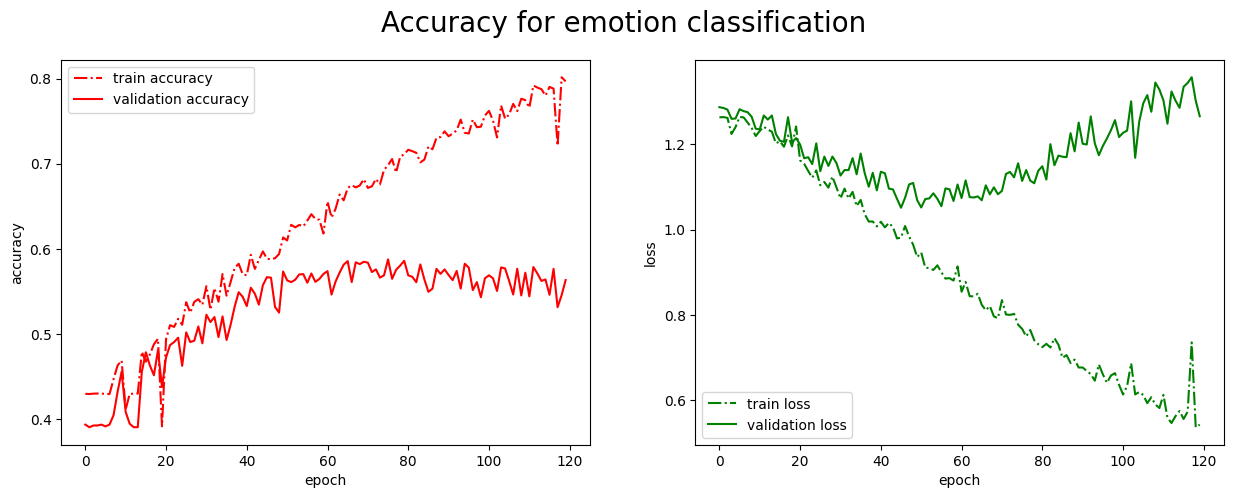

In [44]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(
    epoch_emotion,
    train_acc_emotion,
    color="red",
    linestyle="-.",
    label="train accuracy",
)
axs[0].plot(
    epoch_emotion,
    val_acc_emotion,
    color="red",
    linestyle="-",
    label="validation accuracy",
)
axs[0].legend()
axs[0].set_xlabel("epoch")
axs[0].set_ylabel("accuracy")
axs[1].plot(
    epoch_emotion,
    train_loss_emotion,
    color="green",
    linestyle="-.",
    label="train loss",
)
axs[1].plot(
    epoch_emotion,
    val_loss_emotion,
    color="green",
    linestyle="-",
    label="validation loss",
)
axs[1].legend()
axs[1].set_xlabel("epoch")
axs[1].set_ylabel("loss")
plt.suptitle("Accuracy for emotion classification", fontsize=20)
plt.show()

#### Emoji


In [58]:
# TRAIN_TEXT_IRONY = "tweeteval/datasets/irony/train_text.txt"
# TRAIN_LABELS_IRONY = "tweeteval/datasets/irony/train_labels.txt"
# VAL_TEXT_IRONY = "tweeteval/datasets/irony/test_text.txt"
# VAL_LABELS_IRONY = "tweeteval/datasets/irony/test_labels.txt"

TRAIN_TEXT_IRONY = "tweeteval/datasets/emoji/train_text.txt"
TRAIN_LABELS_IRONY = "tweeteval/datasets/emoji/train_labels.txt"
VAL_TEXT_IRONY = "tweeteval/datasets/emoji/test_text.txt"
VAL_LABELS_IRONY = "tweeteval/datasets/emoji/test_labels.txt"

# TRAIN_TEXT_IRONY = "tweeteval/datasets/offensive/train_text.txt"
# TRAIN_LABELS_IRONY = "tweeteval/datasets/offensive/train_labels.txt"
# VAL_TEXT_IRONY = "tweeteval/datasets/offensive/test_text.txt"
# VAL_LABELS_IRONY = "tweeteval/datasets/offensive/test_labels.txt"

# atheism stance
# TRAIN_TEXT_IRONY= "tweeteval/datasets/stance/atheism/train_text.txt"
# TRAIN_LABELS_IRONY= "tweeteval/datasets/stance/atheism/train_labels.txt"
# VAL_TEXT_IRONY = "tweeteval/datasets/stance/atheism/test_text.txt"
# VAL_LABELS_IRONY = "tweeteval/datasets/stance/atheism/test_labels.txt"


train_loader = create_loader(TRAIN_TEXT_IRONY, TRAIN_LABELS_IRONY, batch_size=32)
val_loader = create_loader(VAL_TEXT_IRONY, VAL_LABELS_IRONY, batch_size=32)

In [64]:
input_dim = 20
hidden_dim = [16, 8]
output_dim = 20
n_layers = 2
learning_rate = 0.001

model = LSTMModel(input_dim, hidden_dim, output_dim, n_layers).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

(
    epoch_irony,
    train_loss_irony,
    val_loss_irony,
    train_acc_irony,
    val_acc_irony,
    max_acc_irony,
) = fit(model, optimizer, criterion, train_loader, val_loader, epochs=30)

  3%|▎         | 49/1407 [00:00<00:02, 481.29it/s]

100%|██████████| 1407/1407 [00:02<00:00, 502.48it/s]


Epoch 0: train loss = 2.938 (acc: 0.109), validation loss = 2.960 (acc: 0.097)


100%|██████████| 1407/1407 [00:02<00:00, 516.35it/s]


Epoch 1: train loss = 2.751 (acc: 0.204), validation loss = 2.756 (acc: 0.216)


100%|██████████| 1407/1407 [00:02<00:00, 521.76it/s]


Epoch 2: train loss = 2.475 (acc: 0.288), validation loss = 2.519 (acc: 0.269)


100%|██████████| 1407/1407 [00:02<00:00, 528.90it/s]


Epoch 3: train loss = 2.447 (acc: 0.295), validation loss = 2.474 (acc: 0.277)


100%|██████████| 1407/1407 [00:02<00:00, 521.35it/s]


Epoch 4: train loss = 2.444 (acc: 0.298), validation loss = 2.479 (acc: 0.280)


100%|██████████| 1407/1407 [00:02<00:00, 536.34it/s]


Epoch 5: train loss = 2.434 (acc: 0.297), validation loss = 2.461 (acc: 0.283)


100%|██████████| 1407/1407 [00:02<00:00, 524.69it/s]


Epoch 6: train loss = 2.433 (acc: 0.300), validation loss = 2.469 (acc: 0.279)


100%|██████████| 1407/1407 [00:02<00:00, 514.04it/s]


Epoch 7: train loss = 2.424 (acc: 0.305), validation loss = 2.459 (acc: 0.283)


100%|██████████| 1407/1407 [00:02<00:00, 517.39it/s]


Epoch 8: train loss = 2.414 (acc: 0.310), validation loss = 2.458 (acc: 0.289)


100%|██████████| 1407/1407 [00:02<00:00, 500.27it/s]


Epoch 9: train loss = 2.402 (acc: 0.314), validation loss = 2.445 (acc: 0.291)


100%|██████████| 1407/1407 [00:02<00:00, 509.45it/s]


Epoch 10: train loss = 2.393 (acc: 0.316), validation loss = 2.434 (acc: 0.290)


100%|██████████| 1407/1407 [00:02<00:00, 494.15it/s]


Epoch 11: train loss = 2.373 (acc: 0.316), validation loss = 2.394 (acc: 0.295)


100%|██████████| 1407/1407 [00:02<00:00, 497.53it/s]


Epoch 12: train loss = 2.356 (acc: 0.318), validation loss = 2.377 (acc: 0.294)


100%|██████████| 1407/1407 [00:02<00:00, 509.54it/s]


Epoch 13: train loss = 2.347 (acc: 0.319), validation loss = 2.359 (acc: 0.297)


100%|██████████| 1407/1407 [00:02<00:00, 518.93it/s]


Epoch 14: train loss = 2.339 (acc: 0.320), validation loss = 2.356 (acc: 0.296)


100%|██████████| 1407/1407 [00:02<00:00, 527.28it/s]


Epoch 15: train loss = 2.339 (acc: 0.320), validation loss = 2.364 (acc: 0.299)


100%|██████████| 1407/1407 [00:02<00:00, 528.28it/s]


Epoch 16: train loss = 2.335 (acc: 0.318), validation loss = 2.350 (acc: 0.303)


100%|██████████| 1407/1407 [00:02<00:00, 525.77it/s]


Epoch 17: train loss = 2.323 (acc: 0.325), validation loss = 2.348 (acc: 0.305)


100%|██████████| 1407/1407 [00:02<00:00, 520.51it/s]


Epoch 18: train loss = 2.333 (acc: 0.321), validation loss = 2.341 (acc: 0.314)


100%|██████████| 1407/1407 [00:02<00:00, 533.38it/s]


Epoch 19: train loss = 2.327 (acc: 0.321), validation loss = 2.333 (acc: 0.311)


100%|██████████| 1407/1407 [00:02<00:00, 519.04it/s]


Epoch 20: train loss = 2.313 (acc: 0.326), validation loss = 2.335 (acc: 0.308)


100%|██████████| 1407/1407 [00:02<00:00, 515.85it/s]


Epoch 21: train loss = 2.315 (acc: 0.328), validation loss = 2.326 (acc: 0.308)


100%|██████████| 1407/1407 [00:02<00:00, 519.14it/s]


Epoch 22: train loss = 2.310 (acc: 0.328), validation loss = 2.341 (acc: 0.308)


100%|██████████| 1407/1407 [00:02<00:00, 522.38it/s]


Epoch 23: train loss = 2.308 (acc: 0.326), validation loss = 2.340 (acc: 0.307)


100%|██████████| 1407/1407 [00:02<00:00, 529.37it/s]


Epoch 24: train loss = 2.296 (acc: 0.334), validation loss = 2.316 (acc: 0.315)


100%|██████████| 1407/1407 [00:02<00:00, 520.10it/s]


Epoch 25: train loss = 2.297 (acc: 0.333), validation loss = 2.331 (acc: 0.311)


100%|██████████| 1407/1407 [00:02<00:00, 534.27it/s]


Epoch 26: train loss = 2.286 (acc: 0.337), validation loss = 2.300 (acc: 0.322)


100%|██████████| 1407/1407 [00:02<00:00, 512.05it/s]


Epoch 27: train loss = 2.279 (acc: 0.339), validation loss = 2.300 (acc: 0.321)


100%|██████████| 1407/1407 [00:02<00:00, 521.39it/s]


Epoch 28: train loss = 2.271 (acc: 0.341), validation loss = 2.299 (acc: 0.324)


100%|██████████| 1407/1407 [00:02<00:00, 478.19it/s]


Epoch 29: train loss = 2.278 (acc: 0.340), validation loss = 2.294 (acc: 0.323)


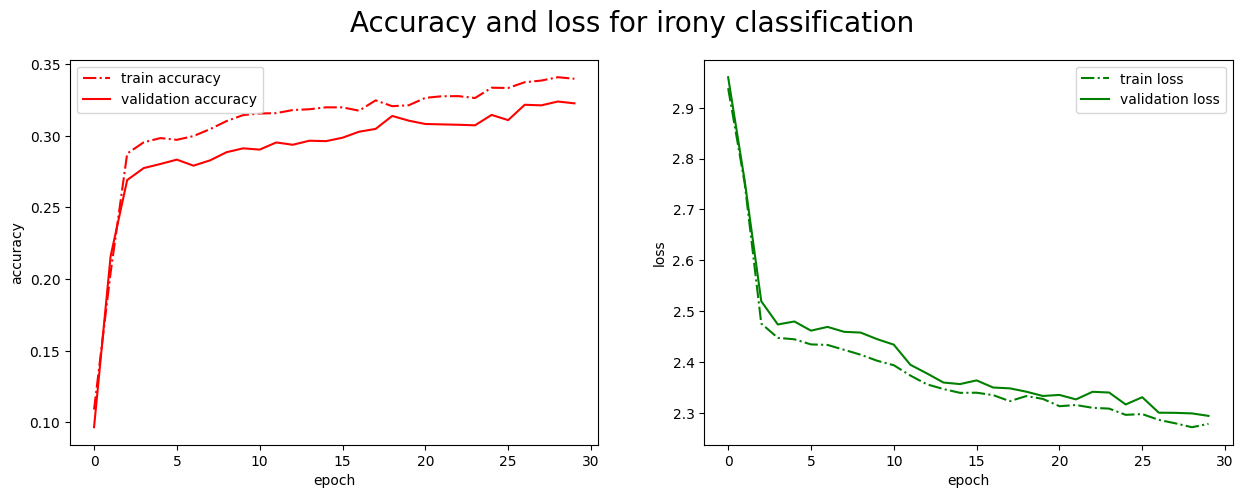

In [65]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(
    epoch_irony, train_acc_irony, color="red", linestyle="-.", label="train accuracy"
)
axs[0].plot(
    epoch_irony, val_acc_irony, color="red", linestyle="-", label="validation accuracy"
)
axs[0].legend()
axs[0].set_xlabel("epoch")
axs[0].set_ylabel("accuracy")
axs[1].plot(
    epoch_irony, train_loss_irony, color="green", linestyle="-.", label="train loss"
)
axs[1].plot(
    epoch_irony, val_loss_irony, color="green", linestyle="-", label="validation loss"
)
axs[1].legend()
axs[1].set_xlabel("epoch")
axs[1].set_ylabel("loss")
plt.suptitle("Accuracy and loss for irony classification", fontsize=20)
plt.show()

## Trenowanie modeli LR (fastText) dla ZJAWISKO_1 i ZJAWISKO_2 (2 pkt.)


#### Emocje (Emotion)


In [67]:
!mkdir emotion_dir && cd emotion_dir && mkdir data

!sed 's/^/__label__/g' tweeteval/datasets/emotion/train_labels.txt > emotion_dir/data/train_labels_emotion.txt
!sed 's/^/__label__/g' tweeteval/datasets/emotion/test_labels.txt > emotion_dir/data/test_labels_emotion.txt
!sed 's/^/__label__/g' tweeteval/datasets/emotion/val_labels.txt > emotion_dir/data/val_labels_emotion.txt

!paste -d " " tweeteval/datasets/emotion/train_text.txt emotion_dir/data/train_labels_emotion.txt > emotion_dir/data/train_emotion.txt
!paste -d " " tweeteval/datasets/emotion/test_text.txt emotion_dir/data/test_labels_emotion.txt > emotion_dir/data/test_emotion.txt
!paste -d " " tweeteval/datasets/emotion/val_text.txt emotion_dir/data/val_labels_emotion.txt > emotion_dir/data/val_emotion.txt

!fasttext supervised -input emotion_dir/data/train_emotion.txt -output emotion_dir/emotion_model -dim 20 -pretrainedVectors fasttext_tweetmodel_btc_sg_20_en.vec -autotune-validation emotion_dir/data/val_emotion.txt

mkdir: cannot create directory ‘emotion_dir’: File exists
Progress: 100.0% Trials:   23 Best score:  0.687166 ETA:   0h 0m 0s
Training again with best arguments
Read 0M words
Number of words:  12887
Number of labels: 4
Progress: 100.0% words/sec/thread:  372228 lr:  0.000000 avg.loss:  0.329187 ETA:   0h 0m 0s


#### Emoji


In [70]:
!mkdir irony_dir && cd irony_dir && mkdir data

!sed 's/^/__label__/g' tweeteval/datasets/irony/train_labels.txt > irony_dir/data/train_labels_irony.txt
!sed 's/^/__label__/g' tweeteval/datasets/irony/test_labels.txt > irony_dir/data/test_labels_irony.txt
!sed 's/^/__label__/g' tweeteval/datasets/irony/val_labels.txt > irony_dir/data/val_labels_irony.txt

!paste -d " " tweeteval/datasets/irony/train_text.txt irony_dir/data/train_labels_irony.txt > irony_dir/data/train_irony.txt
!paste -d " " tweeteval/datasets/irony/test_text.txt irony_dir/data/test_labels_irony.txt > irony_dir/data/test_irony.txt
!paste -d " " tweeteval/datasets/irony/val_text.txt irony_dir/data/val_labels_irony.txt > irony_dir/data/val_irony.txt

!fasttext supervised -input irony_dir/data/train_irony.txt -output irony_dir/irony_model -dim 20 -pretrainedVectors fasttext_tweetmodel_btc_sg_20_en.vec -autotune-validation irony_dir/data/val_irony.txt

terminate called after throwing an instance of 'std::invalid_argument'
  what():  Dimension of pretrained vectors (139928873913168) does not match dimension (100)!


## Ewaluacja modeli na danych testowych dla zjawiska ZJAWISKO_1 (2 pkt.)


In [29]:
!cd emotion_dir && mkdir predictions

!fasttext predict emotion_dir/emotion_model.bin tweeteval/datasets/emotion/test_text.txt | sed 's/__label__//g' > emotion_dir/predictions/emotion.txt

!python tweeteval/evaluation_script.py --tweeteval_path tweeteval/datasets --predictions_path emotion_dir/predictions --task emotion

/bin/bash: line 1: cd: emotion_dir: No such file or directory
/bin/bash: line 1: emotion_dir/predictions/emotion.txt: No such file or directory
terminate called after throwing an instance of 'std::invalid_argument'
  what():  emotion_dir/emotion_model.bin cannot be opened for loading!
Issues with task emotion: [Errno 2] No such file or directory: 'emotion_dir/predictions/emotion.txt'
------------------------------
TweetEval Score (emotion): -1


## Ewaluacja modeli na danych testowych dla zjawiska ZJAWISKO_2 (2 pkt.)


In [ ]:
!cd irony_dir && mkdir predictions

!fasttext predict irony_dir/irony_model.bin tweeteval/datasets/irony/test_text.txt | sed 's/__label__//g' > irony_dir/predictions/irony.txt

!python tweeteval/evaluation_script.py --tweeteval_path tweeteval/datasets --predictions_path irony_dir/predictions --task irony

home/piotr/venvy/DL_LAB1012/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
home/piotr/venvy/DL_LAB1012/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
home/piotr/venvy/DL_LAB1012/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)